# Практика №8
## Логістична регресія

In [2]:
# імпорт необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

В рамках завдання є набір даних (**hearing_test.csv**), який представляє собою результати дослідження, під час якого оцінювалися фізичні здібності учасників, а потім вони проходили аудіотест (*пройшов/не пройшов*), який оцінював їх здатність чути високі частоти. Також зазначався вік учасника. Мета дослідження - вивчити вплив віку і фізичного здоров’я на втрату слуху, зокрема на здатність чути високі тони. Прийняло участь всього 5000 учасників. 

Отже необхідно побудувати модель, яка б передбачила чиюсь ймовірність почути високочастотний звук виключно на основі їх показників (тобто віку і фізичних показників).

* Ознаки

    * age - вік учасника в роках
    * physical_score - оцінка, отримана під час обстеження

* Мітка

    * test_result - 0, якщо тест не пройдено, 1, якщо тест пройдено

In [3]:
# зчитайте дані з файлу hearing_test.csv
df_data = pd.read_csv('./hearing_test.csv')

In [4]:
# виведіть перші 5 рядків
print(df_data.head(5))

    age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1


отримайте кількість тих, хто пройшов і не пройшов тест (див. метод [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html))

In [5]:
# виведіть результат
print(df_data['test_result'].value_counts().get(1))

3000


Побудуйте діаграми розсіювання (*plt.scatter*) для *physical_score* і *test_result*, а також для *age* і *test_result*.
Скористайтеся функцією scatter наступним чином: 
**plt.scatter(x='назва стовпця1', y='назва стовпця2', data=назва_dataframe)**

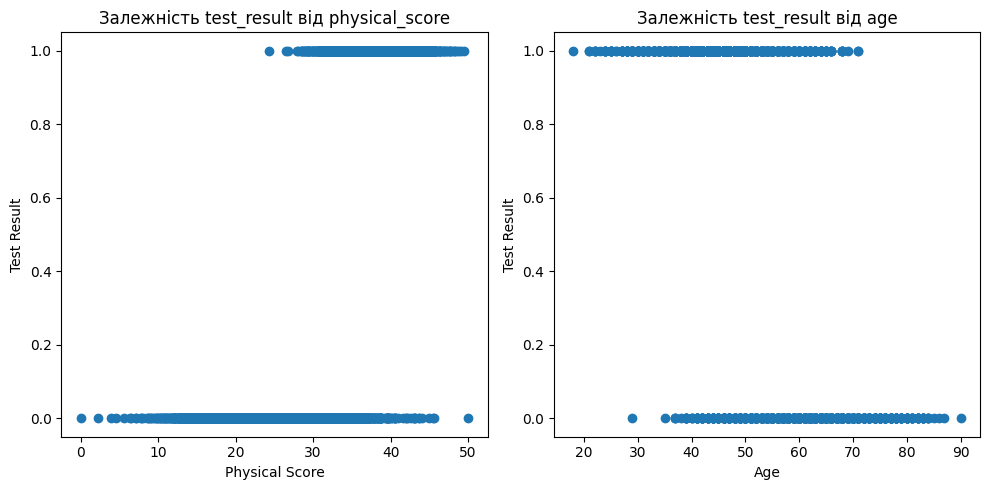

In [17]:
# побудуйте діаграми розсіювання
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x='physical_score', y='test_result', data=df_data)
plt.title('Залежність test_result від physical_score')
plt.xlabel('Physical Score')
plt.ylabel('Test Result')

plt.subplot(1, 2, 2)
plt.scatter(x='age', y='test_result', data=df_data)
plt.title('Залежність test_result від age')
plt.xlabel('Age')
plt.ylabel('Test Result')

plt.tight_layout()
plt.show()

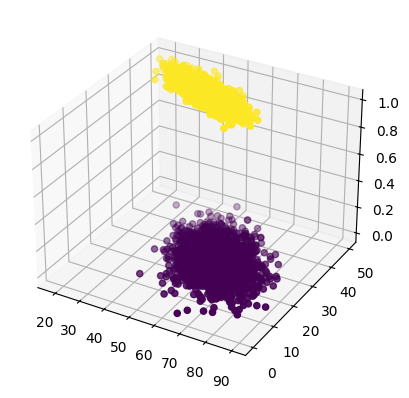

In [7]:
# побудова тривімірної діаграми розсіювання для даних
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data['age'],df_data['physical_score'],df_data['test_result'],c=df_data['test_result'])

Сформуйте матрицю $X$ і вектор міток $y$. Для отримання матриці $X$ (це дані, на яких буде навчатися модель) необхідно з отриманого раніше dataframe видалити стовпець **test_result** (див. метод *drop* і зверніть увагу на параметр *axis*, оскільки необхідно видалити саме стовпці). Вектором $y$ повинен бути лише стовпець **test_result** з отриманого раніше dataframe.

In [8]:
# отримання матриці X і ветору меток y
X = df_data.drop('test_result', axis=1)
y = df_data['test_result']


In [9]:
# Стандартизація ознак за допомогою функції StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [18]:
# Навчіть модель логістичної регресії
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# застосуйте навчену модель до даних X (використайте метод predict)
y_pred = model.predict(X_test)

In [16]:
# виведіть результат точності класифікації за допомогою метрики Accuracy (див. функцію accuracy_score)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.91
